# Unit yield

author: steeve.laquitaine@epfl.ch  
date:   
updated: 27.04.2024  

* The unit yield is a first metrics to quantify the dark matter problem. It reveals the the extreme subsampling of the population within 50 microns of the probe

* method: 
    * we normalize the unit yield by the number of channels because different experiments had a different number of sites in the cortex, while some sites were in the white matter or outside the brain.

* updates
    * Marques silico 40 min (instead of 10 min)
    * Kilosort 3 most recent version

* TODO:
    * rerun all spike sorters with the new spikeinterface version

Activate python environment's `spikinterf0_100_5`

In [2]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface as si 

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config

# DATASETS

# BUCCINO 2020 

data_conf_b, _ = get_config("buccino_2020",  "2020").values()
RECORDING_PATH_b = data_conf_b["probe_wiring"]["output"]
BUCCI_KS3_SORTING_PATH = data_conf_b["sorting"]["sorters"]["kilosort3"]["output"]

KS3_SORTING_PATH_b = data_conf_b["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_b = data_conf_b["sorting"]["sorters"]["kilosort2_5"]["output"]
KS2_SORTING_PATH_b = data_conf_b["sorting"]["sorters"]["kilosort2"]["output"]
KS_SORTING_PATH_b = data_conf_b["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_b = data_conf_b["sorting"]["sorters"]["herdingspikes"]["output"]

# MARQUES

# silico
data_conf_m_s, _ = get_config("silico_neuropixels", "concatenated").values()
RECORDING_PATH_m_s = data_conf_m_s["probe_wiring"]["output"]

KS3_SORTING_PATH_m_s = data_conf_m_s["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_m_s = data_conf_m_s["sorting"]["sorters"]["kilosort2_5"]["output"]
KS2_SORTING_PATH_m_s = data_conf_m_s["sorting"]["sorters"]["kilosort2"]["output"]
KS_SORTING_PATH_m_s = data_conf_m_s["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_m_s = data_conf_m_s["sorting"]["sorters"]["herdingspikes"]["output"]

# vivo
data_conf_m_v, _ = get_config("vivo_marques", "c26").values()
RECORDING_PATH_m_v = data_conf_m_v["probe_wiring"]["output"]

KS3_SORTING_PATH_m_v = data_conf_m_v["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_m_v = data_conf_m_v["sorting"]["sorters"]["kilosort2_5"]["output"]
KS2_SORTING_PATH_m_v = data_conf_m_v["sorting"]["sorters"]["kilosort2"]["output"]
KS_SORTING_PATH_m_v = data_conf_m_v["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_m_v = data_conf_m_v["sorting"]["sorters"]["herdingspikes"]["output"]


# HORVATH

# silico
data_conf_h_s_p1, _ = get_config("silico_horvath", "concatenated/probe_1").values()
RECORDING_PATH_h_s_p1 = data_conf_h_s_p1["probe_wiring"]["output"]

KS3_SORTING_PATH_h_s_p1 = data_conf_h_s_p1["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_h_s_p1 = data_conf_h_s_p1["sorting"]["sorters"]["kilosort2_5"]["output"]
KS2_SORTING_PATH_h_s_p1 = data_conf_h_s_p1["sorting"]["sorters"]["kilosort2"]["output"]
KS_SORTING_PATH_h_s_p1 = data_conf_h_s_p1["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_h_s_p1 = data_conf_h_s_p1["sorting"]["sorters"]["herdingspikes"]["output"]

# vivo
data_conf_h_v_p1, _ = get_config("vivo_horvath", "probe_1").values()
RECORDING_PATH_h_v_p1 = data_conf_h_v_p1["probe_wiring"]["output"]

KS3_SORTING_PATH_h_v_p1 = data_conf_h_v_p1["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_h_v_p1 = data_conf_h_v_p1["sorting"]["sorters"]["kilosort2_5"]["output"]
# KS2_SORTING_PATH_h_v_p1 = data_conf_h_v_p1["sorting"]["sorters"]["kilosort2"]["output"] # fails
KS_SORTING_PATH_h_v_p1 = data_conf_h_v_p1["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_h_v_p1 = data_conf_h_v_p1["sorting"]["sorters"]["herdingspikes"]["output"]


# EVOKED NEUROPIXELS

# silico
data_conf_e, _ = get_config("silico_neuropixels", "stimulus").values()
RECORDING_PATH_e = data_conf_e["probe_wiring"]["output"]

KS3_SORTING_PATH_e = data_conf_e["sorting"]["sorters"]["kilosort3"]["output"]
KS2_5_SORTING_PATH_e = data_conf_e["sorting"]["sorters"]["kilosort2_5"]["output"]
KS2_SORTING_PATH_e = data_conf_e["sorting"]["sorters"]["kilosort2"]["output"]
KS_SORTING_PATH_e = data_conf_e["sorting"]["sorters"]["kilosort"]["output"]
hdsp_SORTING_PATH_e = data_conf_e["sorting"]["sorters"]["herdingspikes"]["output"]



# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_SILI = (0.84, 0.27, 0.2)
COLOR_STIM = (0.6, 0.75, 0.1)
BOX_ASPECT = 1                  # square fig
FIG_SIZE = (1,1)
plt.rcParams['figure.figsize'] = (4,1)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6
plt.rcParams['lines.linewidth'] = 0.2
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['xtick.minor.size'] = 0.1
plt.rcParams['xtick.major.size'] = 1.5
plt.rcParams['ytick.major.size'] = 1.5
plt.rcParams['ytick.major.width'] = 0.3
legend_cfg = {"frameon": False, "handletextpad": 0.1}
savefig_cfg = {"transparent":True}
# print(plt.rcParams.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-04-27 13:26:43,012 - root - utils.py - get_config - INFO - Reading experiment config.
2024-04-27 13:26:43,026 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-04-27 13:26:43,027 - root - utils.py - get_config - INFO - Reading experiment config.
2024-04-27 13:26:43,047 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-04-27 13:26:43,049 - root - utils.py - get_config - INFO - Reading experiment config.
2024-04-27 13:26:43,082 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-04-27 13:26:43,083 - root - utils.py - get_config - INFO - Reading experiment config.
2024-04-27 13:26:43,108 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-04-27 13:26:43,109 - root - utils.py - get_config - INFO - Reading experiment config.
2024-04-27 13:26:43,212 - root - utils.py - get_config - INFO - R

### Get single unit yield per Dataset & Sorters

Buccino dataset

In [3]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_b)
unit_yield_b_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_b)
unit_yield_b_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2
SortingKS2 = si.load_extractor(KS2_SORTING_PATH_b)
unit_yield_b_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_b)
unit_yield_b_KS = SortingKS.get_num_units()

# herdingspikes
SortingKS = si.load_extractor(hdsp_SORTING_PATH_b)
unit_yield_b_hdsp = SortingKS.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
n_sites_in_ctx_b = 384

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


Spikeinterface's version

In [ ]:
si.__version__

Simulated spontaneous Marques

In [6]:
# takes 0.1 sec

# compute

# ks3
# si.load_extractor(KS3_SORTING_PATH_m_s)
KS3_SORTING_PATH_m_s

'/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/0_silico/neuropixels/concatenated_campaigns/SortingKS3_test/'

In [7]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_m_s)
unit_yield_m_s_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_m_s)
unit_yield_m_s_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2
SortingKS2 = si.load_extractor(KS2_SORTING_PATH_m_s)
unit_yield_m_s_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_m_s)
unit_yield_m_s_KS = SortingKS.get_num_units()

# herdingspikes
SortingKS = si.load_extractor(hdsp_SORTING_PATH_m_s)
unit_yield_m_s_hdsp = SortingKS.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
Recording = si.load_extractor(RECORDING_PATH_m_s)
n_sites_in_ctx_m_s = sum(Recording.get_property("layers") != "Outside")

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:78: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


In vivo spontaneous Marques

In [8]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_m_v)
unit_yield_m_v_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_m_v)
unit_yield_m_v_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2
SortingKS2 = si.load_extractor(KS2_SORTING_PATH_m_v)
unit_yield_m_v_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_m_v)
unit_yield_m_v_KS = SortingKS.get_num_units()

# herdingspikes
SortingKS = si.load_extractor(hdsp_SORTING_PATH_m_v)
unit_yield_m_v_hdsp = SortingKS.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
Recording = si.load_extractor(RECORDING_PATH_m_v)
n_sites_in_ctx_m_v = sum(Recording.get_property("layers") != "WM")

Simulated spontaneous Horvath

In [9]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_h_s_p1)
unit_yield_h_s_p1_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_h_s_p1)
unit_yield_h_s_p1_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2
SortingKS2 = si.load_extractor(KS2_SORTING_PATH_h_s_p1)
unit_yield_h_s_p1_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_h_s_p1)
unit_yield_h_s_p1_KS = SortingKS.get_num_units()

# herdingspikes
SortingKS = si.load_extractor(hdsp_SORTING_PATH_h_s_p1)
unit_yield_h_s_p1_hdsp = SortingKS.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
Recording = si.load_extractor(RECORDING_PATH_h_s_p1)
n_sites_in_ctx_h_s_p1 = sum(Recording.get_property("layers") != "Outside")

In vivo spontaneous Horvath

In [10]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_h_v_p1)
unit_yield_h_v_p1_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_h_v_p1)
unit_yield_h_v_p1_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2 (FAILS)
# SortingKS2 = si.load_extractor(KS2_SORTING_PATH_h_v_p1)
# unit_yield_h_v_p1_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_h_v_p1)
unit_yield_h_v_p1_KS = SortingKS.get_num_units()

# herdingspikes
SortingKS = si.load_extractor(hdsp_SORTING_PATH_h_v_p1)
unit_yield_h_v_p1_hdsp = SortingKS.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
Recording = si.load_extractor(RECORDING_PATH_h_v_p1)
n_sites_in_ctx_h_v_p1 = sum(Recording.get_property("layers") != "Outside")

Simulated evoked neuropixels

In [11]:
# takes 0.1 sec

# compute

# ks3
SortingKS3 = si.load_extractor(KS3_SORTING_PATH_e)
unit_yield_e_KS3 = sum(SortingKS3.get_property("KSLabel") == "good")

# ks2.5
SortingKS2_5 = si.load_extractor(KS2_5_SORTING_PATH_e)
unit_yield_e_KS2_5 = sum(SortingKS2_5.get_property("KSLabel") == "good")

# ks2
# SortingKS2 = si.load_extractor(KS2_SORTING_PATH_e)
# unit_yield_e_KS2 = sum(SortingKS2.get_property("KSLabel") == "good")

# ks
# note: no quality metrics was found (except "quality" will all values
# being "unsorted" without definition)
SortingKS = si.load_extractor(KS_SORTING_PATH_e)
unit_yield_e_KS = SortingKS.get_num_units()

# herdingspikes
# note: no quality metrics was found via Sorting.get_property_key()
Sorting = si.load_extractor(hdsp_SORTING_PATH_e)
unit_yield_e_hdsp = Sorting.get_num_units()

# note: mountainsort, check its quality metrics (Jun, 2017)

# count sites in cortex
Recording = si.load_extractor(RECORDING_PATH_e)
n_sites_in_ctx_e = sum(Recording.get_property("layers") != "Outside")

Other neuropixels datasets

In [12]:
# JUN 2017 NATURE DATASET

# - Jun et al., “Fully Integrated Silicon Probes for High-Density Recording of Neural Activity.”
# - 960 electrodes and 384 selectable channels
unit_yield_per_site_jun_2017 = 0.64
unit_yield_per_site_jun_2017_se = 0.32

# PAULK DATASET

# - they had 960 electrodes but selected 384 user-selectable channels
# - they report number single units per patient (we omit patient 3 who
# had a temporal lobectomy)
unit_yield_per_site_paulk_2022_patient_1 = 202 / 384
unit_yield_per_site_paulk_2022_patient_2 = 178 / 384

# ALLEN MICE ?

### Plot

Text(0.5, 0, 'All recordings')

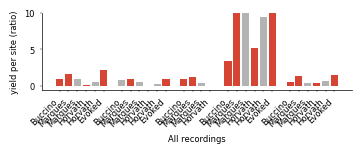

In [13]:
# colors for in silico and in vivo
experiments = [
    "Buccino",  # KS3
    "Marques",  # KS3 - silico
    "Marques",  # KS3 - vivo
    "Horvath",  # KS3 - silico
    "Horvath",  # KS3 - vivo
    "Evoked",  # KS3
    "Buccino",  # KS2.5
    "Marques",  # KS2.5 - silico
    "Marques",  # KS2.5 - vivo
    "Horvath",  # KS2.5 - silico
    "Horvath",  # KS2.5 - vivo
    "Evoked",  # KS2.5
    "Buccino",  # KS2
    "Marques",  # KS2 - silico
    "Marques",  # KS2 - vivo
    "Horvath",  # KS2 - silico
    "Buccino",  # KS
    "Marques",  # KS - silico
    "Marques",  # KS - vivo
    "Horvath",  # KS - silico
    "Horvath",  # KS - vivo
    "Evoked",  # KS
    "Buccino",  # herdingspikes
    "Marques",  # herdingspikes - silico
    "Marques",  # herdingspikes - vivo
    "Horvath",  # herdingspikes - silico
    "Horvath",  # herdingspikes - vivo
    "Evoked",  # herdingspikes
]

colors = [
    COLOR_SILI,  # KS3
    COLOR_SILI,  # KS3 - silico
    COLOR_VIVO,  # KS3 - vivo
    COLOR_SILI,  # KS3 - silico
    COLOR_VIVO,  # KS3 - vivo
    COLOR_SILI,  # KS3
    COLOR_VIVO,  # KS2.5
    COLOR_SILI,  # KS2.5 - silico
    COLOR_VIVO,  # KS2.5 - vivo
    COLOR_SILI,  # KS2.5 - silico
    COLOR_VIVO,  # KS2.5 - vivo
    COLOR_SILI,  # KS2.5
    COLOR_SILI,  # KS2
    COLOR_SILI,  # KS2 - silico
    COLOR_VIVO,  # KS2 - vivo
    COLOR_SILI,  # KS2 - silico
    COLOR_SILI,  # KS
    COLOR_SILI,  # KS - silico
    COLOR_VIVO,  # KS - vivo
    COLOR_SILI,  # KS - silico
    COLOR_VIVO,  # KS - vivo
    COLOR_SILI,  # KS
    COLOR_SILI,  # herdingspikes
    COLOR_SILI,  # herdingspikes - silico
    COLOR_VIVO,  # herdingspikes - vivo
    COLOR_SILI,  # herdingspikes - silico
    COLOR_VIVO,  # herdingspikes - vivo
    COLOR_SILI,  # herdingspikes
]

unit_yields_per_site = [
    unit_yield_b_KS3 / n_sites_in_ctx_b,  # KS3
    unit_yield_m_s_KS3 / n_sites_in_ctx_m_s,  # KS3 - silico
    unit_yield_m_v_KS3 / n_sites_in_ctx_m_v,  # KS3 - vivo
    unit_yield_h_s_p1_KS3 / n_sites_in_ctx_h_s_p1,  # KS3 - silico
    unit_yield_h_v_p1_KS3 / n_sites_in_ctx_h_v_p1,  # KS3 - vivo
    unit_yield_e_KS3 / n_sites_in_ctx_e,  # KS3
    unit_yield_b_KS2_5 / n_sites_in_ctx_b,  # KS2.5
    unit_yield_m_s_KS2_5 / n_sites_in_ctx_m_s,  # KS2.5 - silico
    unit_yield_m_v_KS2_5 / n_sites_in_ctx_m_v,  # KS2.5 - vivo
    unit_yield_h_s_p1_KS2_5 / n_sites_in_ctx_h_s_p1,  # KS2.5 - silico
    unit_yield_h_v_p1_KS2_5 / n_sites_in_ctx_h_v_p1,  # KS2.5 - vivo
    unit_yield_e_KS2_5 / n_sites_in_ctx_e,  # KS2.5
    unit_yield_b_KS2 / n_sites_in_ctx_b,  # KS2
    unit_yield_m_s_KS2 / n_sites_in_ctx_m_s,  # KS2 - silico
    unit_yield_m_v_KS2 / n_sites_in_ctx_m_v,  # KS2 - vivo
    unit_yield_h_s_p1_KS2 / n_sites_in_ctx_h_s_p1,  # KS2 - silico
    unit_yield_b_KS / n_sites_in_ctx_b,  # KS
    unit_yield_m_s_KS / n_sites_in_ctx_m_s,  # KS - silico
    unit_yield_m_v_KS / n_sites_in_ctx_m_v,  # KS - vivo
    unit_yield_h_s_p1_KS / n_sites_in_ctx_h_s_p1,  # KS - silico
    unit_yield_h_v_p1_KS / n_sites_in_ctx_h_v_p1,  # KS - vivo
    unit_yield_e_KS / n_sites_in_ctx_e,  # KS
    unit_yield_b_hdsp / n_sites_in_ctx_b,  # herdingspikes
    unit_yield_m_s_hdsp / n_sites_in_ctx_m_s,  # herdingspikes - silico
    unit_yield_m_v_hdsp / n_sites_in_ctx_m_v,  # herdingspikes - vivo
    unit_yield_h_s_p1_hdsp / n_sites_in_ctx_h_s_p1,  # herdingspikes - silico
    unit_yield_h_v_p1_hdsp / n_sites_in_ctx_h_v_p1,  # herdingspikes - vivo
    unit_yield_e_hdsp / n_sites_in_ctx_e,  # herdingspikes
]


# yield standard error
yields_err = np.zeros(len(unit_yields_per_site))

x = [
    0,  # KS3
    1,  # KS3 - silico
    2,  # KS3 - vivo
    3,  # KS3 - silico
    4,  # KS3 - vivo
    5,  # KS3
    7,  # KS2.5
    8,  # KS2.5 - silico
    9,  # KS2.5 - vivo
    10,  # KS2.5 - silico
    11,  # KS2.5 - vivo
    12,  # KS2.5
    14,  # KS2
    15,  # KS2 - silico
    16,  # KS2 - vivo
    17,  # KS2 - silico
    19,  # KS
    20,  # KS - silico
    21,  # KS - vivo
    22,  # KS - silico
    23,  # KS - vivo
    24,  # KS
    26,  # herdingspikes
    27,  # herdingspikes - silico
    28,  # herdingspikes - vivo
    29,  # herdingspikes - silico
    30,  # herdingspikes - vivo
    31,  # herdingspikes
]


# plot
fig, ax = plt.subplots(1, 1)
ax.bar(x, unit_yields_per_site, color=colors, zorder=1000)

# legend
ax.set_ylim([-0.5, 10])
ax.set_xticks(x)
ax.set_xticklabels(
    experiments,
    rotation=45,
    ha="right",
)
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("yield per site (ratio)")
ax.set_xlabel("All recordings")

# # save figures
# plt.savefig(
#     "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/figures/3_bias/svg/unit_yields_rat.svg",
#     **savefig_cfg,
# )

Text(0.5, 0, 'Spike sorter')

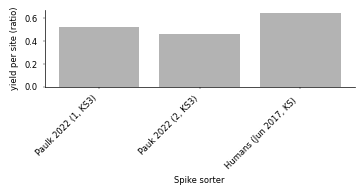

In [14]:
# plot
unit_yields_per_site = [
    unit_yield_per_site_paulk_2022_patient_1,
    unit_yield_per_site_paulk_2022_patient_2,
    unit_yield_per_site_jun_2017,
]

# yield standard error
yields_err = np.zeros(len(unit_yields_per_site))
x = [0, 1, 2]

# plot
fig, ax = plt.subplots(1, 1)
ax.errorbar(
    x,
    unit_yields_per_site,
    yerr=yields_err,
    linestyle="None",
    color=(0.7, 0.7, 0.7),
)
ax.bar(x, unit_yields_per_site, color=(0.7, 0.7, 0.7), zorder=1000)
ax.set_xticks(x)
ax.set_xticklabels(
    [
        "Paulk 2022 (1, KS3)",
        "Pauk 2022 (2, KS3)",
        "Humans (Jun 2017, KS) ",
    ],
    rotation=45,
    ha="right",
)
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("yield per site (ratio)")
ax.set_xlabel("Spike sorter")

# # save figures
# plt.savefig(
#     "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/figures/3_bias/svg/unit_yield_spontaneou_humans.svg",
#     **savefig_cfg,
# )